In [89]:
import torch
import matplotlib.pyplot as plt
import numpy as np
#import torch.nn as nn
#import torch.nn.functional as F
import pandas as pd
import seaborn as sns

In [3]:
CNN1_data = np.load('../activation_data/CNN_1_seed21_kaiming_normal_20250328_153931/CNN_1/block1_activations.npz')

KeysView(NpzFile '../activation_data/CNN_1_seed21_kaiming_normal_20250328_153931/CNN_1/block1_activations.npz' with keys: activations, numerosities, stimulus_types, timestamp)


In [6]:
activations = CNN1_data['activations']
numerosities = CNN1_data['numerosities']
stimulus_types = CNN1_data['stimulus_types']

In [25]:
print(f'activations_shape: {activations.shape}')
print(f'numerosities_shape: {numerosities.shape}')
print(f'stimulus_types_shape: {stimulus_types.shape}')

activations_shape: (3000, 64, 60, 80)
numerosities_shape: (3000,)
stimulus_types_shape: (3000,)


In [10]:
n_samples = activations.shape[0]
flat_activations = activations.reshape(n_samples, -1)

In [26]:
print(f'flat_activations_shape: {flat_activations.shape}')

flat_activations_shape: (3000, 307200)


In [13]:
neuron_indices = np.arange(flat_activations.shape[1])

In [36]:
numerosities[stimulus_types=='standard'].shape

(750,)

In [106]:
index_neuron = 11472
index_neuron_data = pd.DataFrame({
            'activation': flat_activations[:,index_neuron],
            'numerosity': [int(n) for n in numerosities],
            'stimulus_type': stimulus_types
        })

<Axes: xlabel='numerosity', ylabel='activation'>

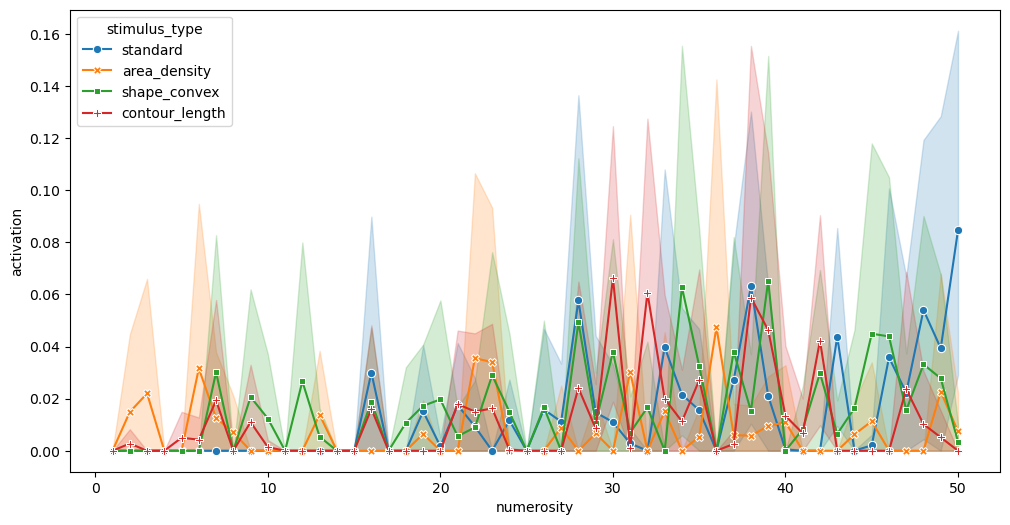

In [107]:
plt.figure(figsize=(12, 6))

sns.lineplot(x="numerosity", y="activation",
             hue="stimulus_type",style="stimulus_type", data =index_neuron_data,
    markers=True, dashes=False)

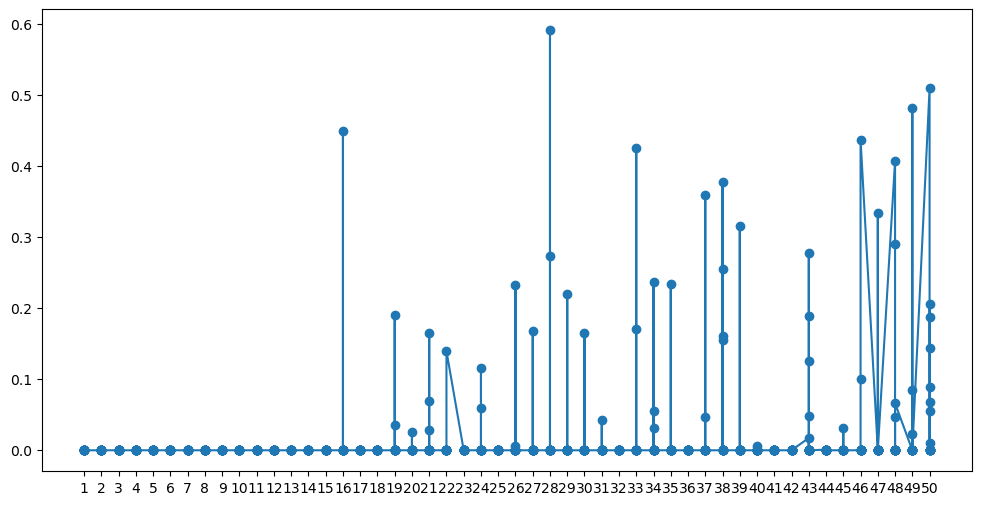

In [88]:
plt.figure(figsize=(12, 6))

plt.plot(index_neuron_data[index_neuron_data['stimulus_type']=='standard']['numerosity'],
         index_neuron_data[index_neuron_data['stimulus_type']=='standard']['activation'],
         marker='o', linestyle='-')



In [73]:
grouped_data = index_neuron_data.groupby(['stimulus_type', 'numerosity'])['activation'].mean().unstack()
grouped_data = grouped_data.sort_index(axis=1)

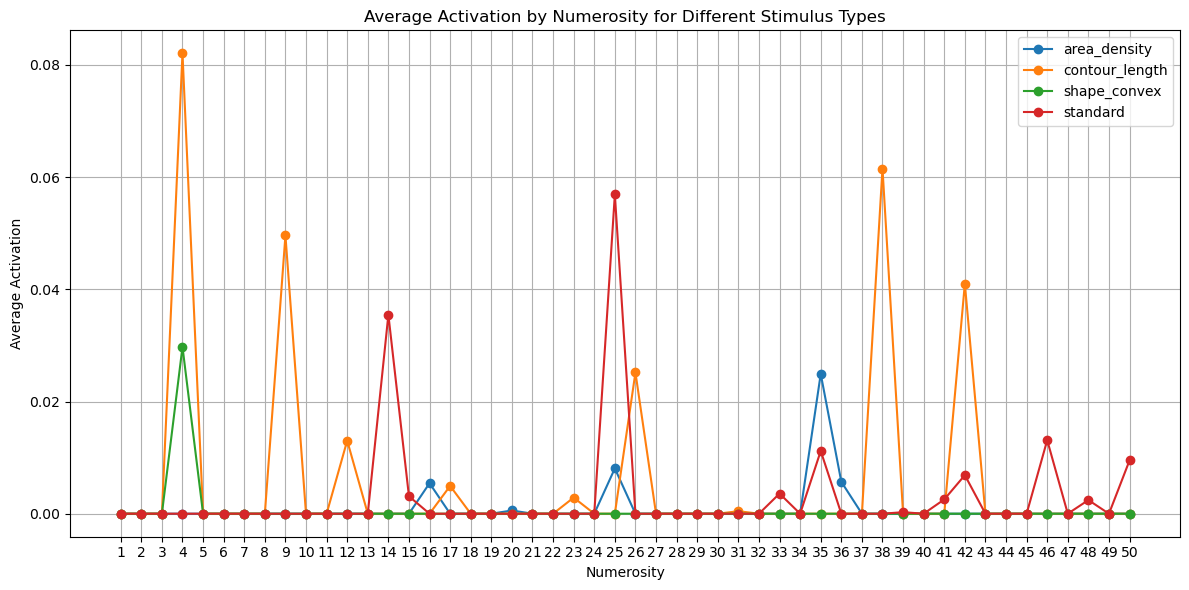

In [82]:
plt.figure(figsize=(12, 6))

for stimulus in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[stimulus], 
             marker='o', linestyle='-', label=stimulus)

plt.title('Average Activation by Numerosity for Different Stimulus Types')
plt.xlabel('Numerosity')
plt.ylabel('Average Activation')
plt.legend()
plt.grid(True)
plt.xticks(grouped_data.columns)  # 确保 x 轴显示所有 numerosity
plt.tight_layout()

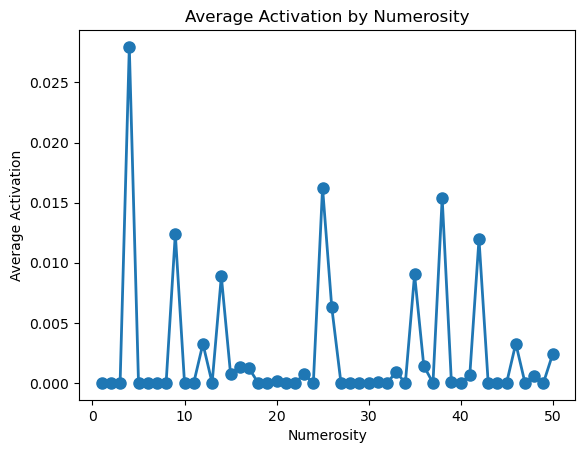

In [54]:
avg_by_num.idxmax()

'4'

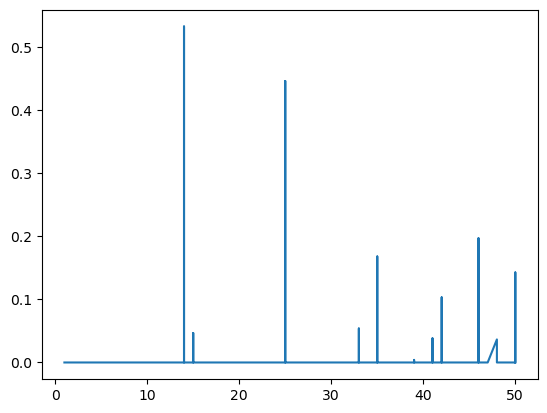

In [38]:
plt.plot(numerosities[stimulus_types=='standard'],flat_activations[:,12795][stimulus_types=='standard'])

In [ ]:
indices = np.where((numerosities == '') & (stimulus_types == stim_type))[0]
